<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/FYP/blob/main/HealthMonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Long Short Term Memory

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val.strip(',')) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = LSTM(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=40,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/40
36/36 [==============================] - 21s 467ms/step - loss: 0.6740 - accuracy: 0.5964 - val_loss: 0.6638 - val_accuracy: 0.6984
Epoch 2/40
36/36 [==============================] - 16s 446ms/step - loss: 0.6597 - accuracy: 0.6631 - val_loss: 0.6499 - val_accuracy: 0.7540
Epoch 3/40
36/36 [==============================] - 16s 436ms/step - loss: 0.6444 - accuracy: 0.7147 - val_loss: 0.6342 - val_accuracy: 0.7381
Epoch 4/40
36/36 [==============================] - 16s 447ms/step - loss: 0.6284 - accuracy: 0.7236 - val_loss: 0.6182 - val_accuracy: 0.7778
Epoch 5/40
36/36 [==============================] - 17s 459ms/step - loss: 0.6140 - accuracy: 0.7396 - val_loss: 0.6014 - val_accuracy: 0.7857
Epoch 6/40
36/36 [==============================] - 16s 434ms/step - loss: 0.5981 - accuracy: 0.7591 - val_loss: 0.5838 - val_accuracy: 0.8254
Epoch 7/40
36/36 [==============================] - 16s 449ms/step - loss: 0.5805 - accuracy: 0.7742 - val_loss: 0.5634 - val_accuracy: 0.8492

###Training Accuracy = 98% and Test Accuracy = 98% for 40 epochs

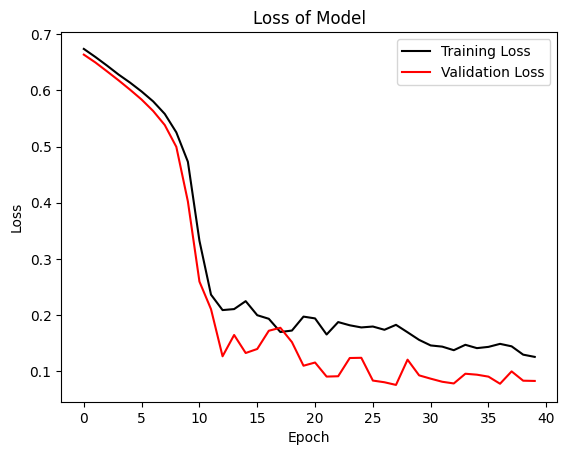

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='black')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled).round().astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

40/40 [==============================] - 4s 95ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       634
           1       0.99      0.98      0.98       617

    accuracy                           0.98      1251
   macro avg       0.98      0.98      0.98      1251
weighted avg       0.98      0.98      0.98      1251



##Using Simple Recurrent Neural Network

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')
data['Sequence'] = data['Sequence'].apply(lambda x: [float(val.strip(',')) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = SimpleRNN(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping =tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=80,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/80
36/36 [==============================] - 8s 146ms/step - loss: 0.7289 - accuracy: 0.4747 - val_loss: 0.6880 - val_accuracy: 0.5397
Epoch 2/80
36/36 [==============================] - 5s 147ms/step - loss: 0.7260 - accuracy: 0.4924 - val_loss: 0.6744 - val_accuracy: 0.6032
Epoch 3/80
36/36 [==============================] - 4s 109ms/step - loss: 0.7036 - accuracy: 0.5396 - val_loss: 0.6645 - val_accuracy: 0.6429
Epoch 4/80
36/36 [==============================] - 4s 106ms/step - loss: 0.7081 - accuracy: 0.5093 - val_loss: 0.6557 - val_accuracy: 0.6587
Epoch 5/80
36/36 [==============================] - 5s 147ms/step - loss: 0.6889 - accuracy: 0.5458 - val_loss: 0.6474 - val_accuracy: 0.6508
Epoch 6/80
36/36 [==============================] - 4s 109ms/step - loss: 0.6804 - accuracy: 0.5671 - val_loss: 0.6391 - val_accuracy: 0.6429
Epoch 7/80
36/36 [==============================] - 4s 107ms/step - loss: 0.6782 - accuracy: 0.5547 - val_loss: 0.6325 - val_accuracy: 0.6905
Epoch 

###Training Accuracy = 84% and Test Accuracy = 88% for 80 epochs

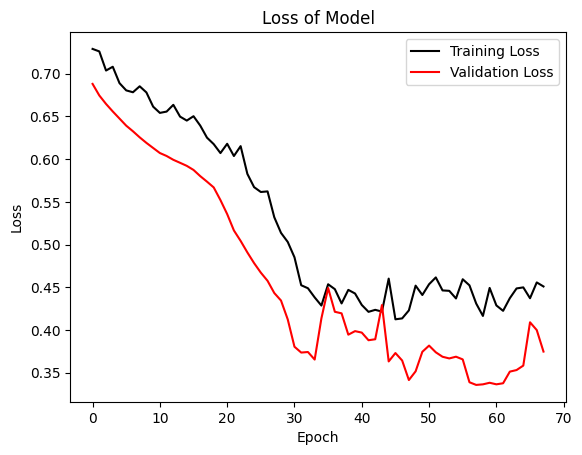

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='black')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled).round().astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

5/5 [==============================] - 0s 46ms/step
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        61
           1       0.87      0.94      0.90        78

    accuracy                           0.88       139
   macro avg       0.89      0.88      0.88       139
weighted avg       0.89      0.88      0.88       139



##Using Gated Recurrent Unit

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val.strip(',')) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = GRU(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=40,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/40
36/36 [==============================] - 17s 388ms/step - loss: 0.6846 - accuracy: 0.5049 - val_loss: 0.6801 - val_accuracy: 0.5794
Epoch 2/40
36/36 [==============================] - 22s 617ms/step - loss: 0.6734 - accuracy: 0.5422 - val_loss: 0.6696 - val_accuracy: 0.6111
Epoch 3/40
36/36 [==============================] - 13s 376ms/step - loss: 0.6672 - accuracy: 0.5716 - val_loss: 0.6604 - val_accuracy: 0.6508
Epoch 4/40
36/36 [==============================] - 14s 383ms/step - loss: 0.6599 - accuracy: 0.6151 - val_loss: 0.6510 - val_accuracy: 0.6746
Epoch 5/40
36/36 [==============================] - 14s 378ms/step - loss: 0.6515 - accuracy: 0.6151 - val_loss: 0.6416 - val_accuracy: 0.6746
Epoch 6/40
36/36 [==============================] - 13s 374ms/step - loss: 0.6380 - accuracy: 0.6471 - val_loss: 0.6325 - val_accuracy: 0.7302
Epoch 7/40
36/36 [==============================] - 14s 397ms/step - loss: 0.6270 - accuracy: 0.6747 - val_loss: 0.6226 - val_accuracy: 0.7302

###Training Accuracy = 93% and Test Accuracy = 94% for 40 epochs

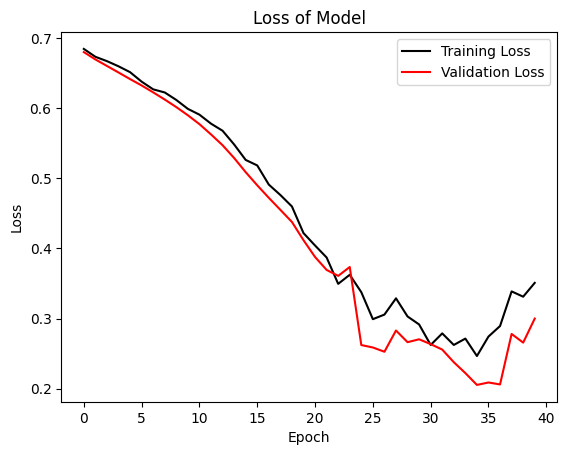

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='black')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled).round().astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

5/5 [==============================] - 1s 131ms/step
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        61
           1       0.96      0.92      0.94        78

    accuracy                           0.94       139
   macro avg       0.93      0.94      0.93       139
weighted avg       0.94      0.94      0.94       139

